## 연속형 확률변수
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%precision 3

'%.3f'

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = '미적분관계1.jpg' STYLE='width 100px;'>
<img src = '미적분관계3.jpg' STYLE='width 100px;'>


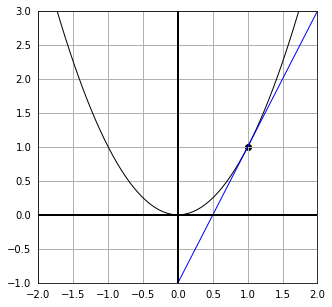

In [7]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


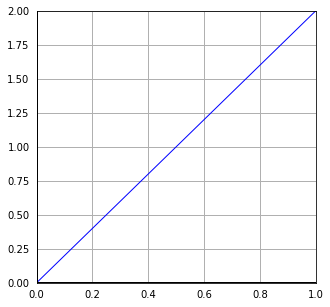

In [8]:
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


### 1차원 연속형 확률변수의 정의
- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며 확률은 확률밀도함수(PDF) 또는 간단히 밀도함수라고 부르는 f(x)에 의해 정의된다.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.


#### 과제_0829_1
p173 ~ 180 예제 풀어보세요

#### 과제_0829_2
p181 ~ 187 예제 풀어보세요

#### 과제_0829_3
p188 ~ 191 예제 풀어보세요(colab 이용)

#### 과제_0829_4
미분, 적분 공부한 후 미적분 관계를 설명해 보세요.

#### 과제_0830_1
p192 ~ 199 예제 풀어보세요(colab 이용)

## 대표적인 연속형 확률분포

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar


In [4]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0] # 적분값과 추정 오차를 반환하는 함수(피적분함수, 적분 범위)

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):  # 확률변수와 구간을 인수로 취하고 그 확률변수의 밀도함수와 분포함수를 그리는 함수
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## 정규분포
- 통계분석에서 자주 사용되는 중요한 확률분포로 자연계에서 일어나는 수많은 현상을 표현. 가우스 분포라고도 부름
- 정규분포가 취할 수 있는 값은 실수 전체로 파라미터는 $평균(\mu)과 분산(\sigma^2)$ 두가지이다. $N(\mu,\sigma^2)$으로 표기


- 정규분포의 밀도 함수
<img src = './data/정규분포.jpg' STYLE='width 200px;'>


- Numpy의 numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
- 자연상수(natural constant) e는 2.718281828459045… 이란 숫자입니다. 파이(π)처럼 소수점 아래에 끝이 없는 무리수
- 자연 로그(natural logarithm)의 라틴 이름은 logarithm naturali 인데요, 이를 줄여서 ln이라고 합니다. 자연로그는 자연 상수 e를 밑(base)으로 하는 로그(log)입니다.
- 자연 상수 e는 어떤 대상이 얼마 만큼 성장했는지를 알려 주는 수라면, 자연로그는 그 성장을 이루기 위해 얼마의 시간(또는 기간)이 필요한 지를 계산하는 것이라고 볼 수 있습니다.
- 자연 상수 e의 의미와 자연 상수 e와 자연 로그의 관계를 이해하면, 자연 로그 값이 왜 성장을 달성하기 위한 시간(기간)을 알려 주는 지 이유를 알 수 있는데요


In [9]:
def N(mu, sigma):
    x_range = [-np.inf,np.inf]
    def f(x):
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

In [10]:
mu, sigma = 2, 0.5
X = N(mu,sigma)

In [11]:
check_prob(X)

expected vaue 2.000
variance 0.250


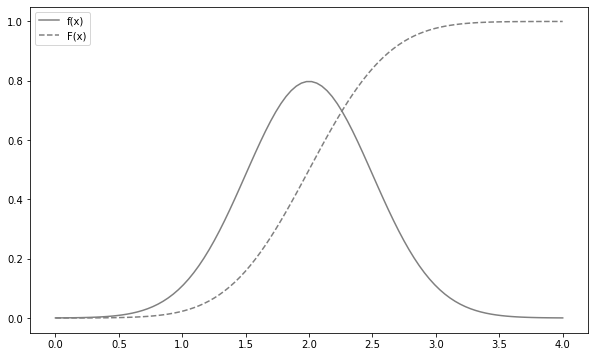

In [13]:
plot_prob(X,0,4)

In [15]:
# scipy.stats.norm은 가우시안 정규분포 객체를 생성하는 메서드
rv = stats.norm(2, 0.5)

In [16]:
rv

In [17]:
rv.mean(), rv.var()

(2.0, 0.25)

In [18]:
rv.pdf(2)

0.7978845608028654

In [19]:
rv.cdf(1.7)

0.27425311775007355

In [23]:
# isf : 생존함수의 역함수(inverse survival function), 상위 30% 점
rv.isf(0.3)

2.2622002563540207

In [24]:
# interval : 확률이 알파가 되는 가운데 부분의 구간을 구할 수 있다.(90% 구간)
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [26]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

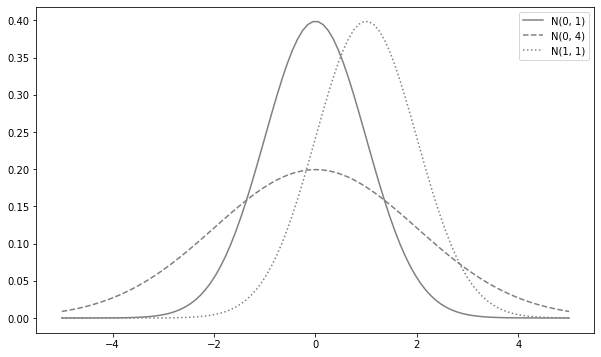

In [27]:
linestyles = ['-', '--', ':']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]  # 세가지 파라미터
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

In [30]:
stats.norm.pdf(loc=0, scale=1, x=0)

0.3989422804014327

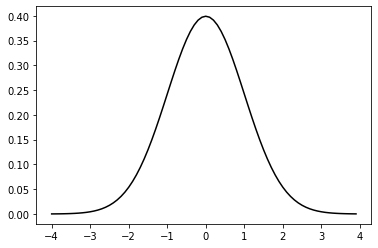

In [31]:
x_plot = np.arange(-4, 4, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=0, scale=1),color='black')

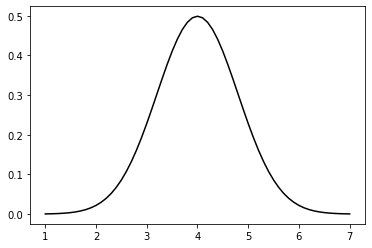

In [33]:
# x : 1 ~ 7.1 , 평균 4, 표준편차 0.8 인 정규분포 곡선을 출력하세요.
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot, stats.norm.pdf(x=x_plot, loc=4, scale=0.8),color='black')

In [34]:
# 확률변수가 4일때의 확률밀도
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=4)

0.49867785050179086

In [35]:
# 누적분포함수
stats.norm.cdf(loc=4,scale=0.8,x=7)

0.9999115827147992

#### 과제_0830_2
- 상기 누적분포함수를 그래프로 출력하세요.
- 확률변수가 4일때 누적분포값(확률)
- 확률이 0.5일때 확률변수를 구하세요.

#### 확률분포함수

- pmf 확률질량함수(probability mass function)
- pdf 확률밀도함수(probability density function)
- cdf 누적분포함수(cumulative distribution function)
- ppf 누적분포함수의 역함수(inverse cumulative distribution function)
- sf 생존함수(survival function) = 1 - 누적분포함수
- isf 생존함수의 역함수(inverse survival function)
- rvs 랜덤 표본 생성(random variable sampling)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html


Text(0.5, 1.0, '확률밀도함수와 누적분포함수')

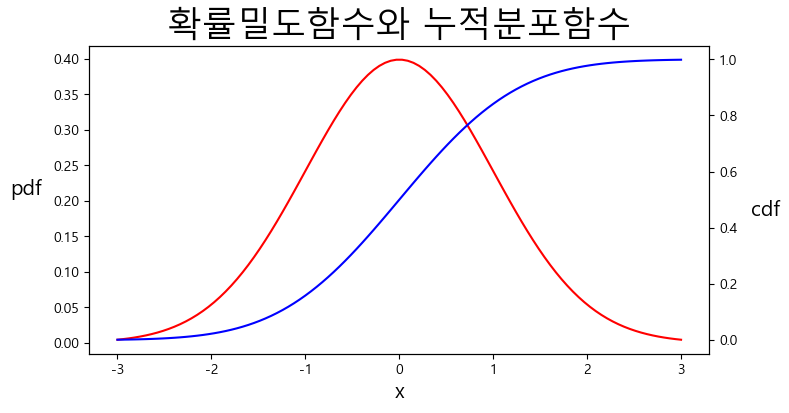

In [36]:
from matplotlib import rc
plt.style.use('default')
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8, 4))  
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
rv = stats.norm(0, 1)
xx = np.linspace(-3,3,100)
y1 =rv.pdf(xx)
y2 =rv.cdf(xx)
        # 플롯 사이즈 지정
ax1.plot(xx, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성  
ax2.plot(xx, y2, color='blue')
ax1.set_xlabel("x",fontsize=15)                      # x축 레이블 지정
ax1.set_ylabel("pdf",rotation=0, fontsize=15,labelpad=20) 
ax2.set_ylabel("cdf",rotation=0, fontsize=15,labelpad=20) # y축 레이블 지정
                         # 플롯에 격자 보이기
# ax1.legend(loc='center left')              # 범례 표시
# ax2.legend(loc='center right') 
plt.title('확률밀도함수와 누적분포함수',fontsize=25)


In [37]:
rv.cdf(0)

0.5

In [38]:
rv.cdf(1)

0.8413447460685429

In [39]:
# ppf : 누적분포함수의 역함수. 누적분포가 0.5인 x값
rv.ppf(0.5)

0.0

In [40]:
rv.ppf(0.95)

1.6448536269514722

In [41]:
# 0 ~1까지 누적확률분포
rv.cdf(1) - rv.cdf(0)

0.3413447460685429

In [42]:
# (-2 < x < 2) 확률을 구하세요.
rv.cdf(2) - rv.cdf(-2)

0.9544997361036416

#### 과제_0830_3
- 상위 5% 확률의 확률변수를 구하세요
- 하위 5% 확률의 확률변수를 구하세요

#### 과제_0830_4
아래 문제를 풀어보세요.
1. 어느 회사에서 종업원들의 근무기간을 조사하였는데, 종업원들의 근무기간은 평균이 11년이고 표준편차가 4년인 정규분포를 따른다고 한다. 그럼 이 회사에서 14년 이상 근무한 종업원의 비율을 구하시오 

2. 어느 전구회사의 전구의 수명은 평균 800일, 표준편차 30일인 정규분포를 따른다. 전구의 수명이 760일 이하일 확률 구하시오 

3. 어느 고등학교 3학년 학생들의 수학 성적은 평균이 70점이고 분산이 64점인 정규분포를 따른다고 한다. 그럼 점수가 80점 이상이고 90점 이하일 확률을 구하시오
